# K Nearest Neighbor algorithm back up

# Import

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics


import os
from scipy.misc import imread
import tensorflow as tf

C:\Users\Teha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Teha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
np.set_printoptions(precision=4,suppress = True)
%matplotlib inline
rcParams['figure.figsize']= 7,4
plt.style.use('seaborn-whitegrid') 

In [4]:
address = 'G:/jpura/3rd year 1st semester/machine learning/assignment/Adult_Census_Income_Binary_Classification_dataset.csv'
adults = pd.read_csv(address)



In [5]:
#replace the missing values with NaT
adults = adults.replace(" ?", pd.NaT)
adults.dropna(inplace=True)


In [6]:
print(adults)

       age          workclass      education   education-num  \
0       39          State-gov      Bachelors              13   
1       50   Self-emp-not-inc      Bachelors              13   
2       38            Private        HS-grad               9   
3       53            Private           11th               7   
4       28            Private      Bachelors              13   
5       37            Private        Masters              14   
6       49            Private            9th               5   
7       52   Self-emp-not-inc        HS-grad               9   
8       31            Private        Masters              14   
9       42            Private      Bachelors              13   
10      37            Private   Some-college              10   
11      30          State-gov      Bachelors              13   
12      23            Private      Bachelors              13   
13      32            Private     Assoc-acdm              12   
15      34            Private        7th

In [7]:
adults=adults.apply(lambda col: pd.factorize(col, sort=True)[0])

In [8]:
print(adults)

       age   workclass   education   education-num   marital-status  \
0       22           5           9              12                4   
1       33           4           9              12                2   
2       21           2          11               8                0   
3       36           2           1               6                2   
4       11           2           9              12                2   
5       20           2          12              13                2   
6       32           2           6               4                3   
7       35           4          11               8                2   
8       14           2          12              13                4   
9       25           2           9              12                2   
10      20           2          15               9                2   
11      13           5           9              12                2   
12       6           2           9              12                4   
13    

# normalizing 

In [9]:


from sklearn.preprocessing import MinMaxScaler 
data_values = adults.iloc[:,:].values

min_max = MinMaxScaler()
adults.iloc[:,[9,10]] =min_max.fit_transform(data_values[:,[9,10]])






C:\Users\Teha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
x_prime=adults.iloc[:,0:13].values
y=adults.iloc[:,13].values


X=preprocessing.scale(x_prime)

In [11]:
print(adults)

       age   workclass   education   education-num   marital-status  \
0       22           5           9              12                4   
1       33           4           9              12                2   
2       21           2          11               8                0   
3       36           2           1               6                2   
4       11           2           9              12                2   
5       20           2          12              13                2   
6       32           2           6               4                3   
7       35           4          11               8                2   
8       14           2          12              13                4   
9       25           2           9              12                2   
10      20           2          15               9                2   
11      13           5           9              12                2   
12       6           2           9              12                4   
13    

# split the dataset for training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Fit a model

In [13]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
clf.score(X_test, y_test)

0.8322559257417537

In [15]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8322559257417537

# Logistic Regression

In [16]:
from keras.utils import np_utils

NB_CLASSES = 2 #No of classes
y_test_one_hot = np_utils.to_categorical(y_test, NB_CLASSES)
y_train_one_hot = np_utils.to_categorical(y_train, NB_CLASSES)

Using TensorFlow backend.


In [17]:
print ("Size(X_train) = ", X_train.shape)
print ("Size(y_train_one_hot) = ", y_train_one_hot.shape)
print ("Size(X_test) = ", X_test.shape)
print ("Size(y_test_one_hot) = ", y_test_one_hot.shape)

Size(X_train) =  (24129, 13)
Size(y_train_one_hot) =  (24129, 2)
Size(X_test) =  (6033, 13)
Size(y_test_one_hot) =  (6033, 2)


# Building the logisitic model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
NB_CLASSES = 2
INPUT_DIM  = 13

model = Sequential()
model.add(Dense(NB_CLASSES, activation='softmax', input_shape=(INPUT_DIM,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

In [19]:
from keras.optimizers import SGD

OPTIMIZER = SGD(lr=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

In [20]:
BATCH_SIZE = 100
EPOCHES = 13
VERBOSE = 1

model_history = model.fit(x=X_train, y=y_train_one_hot, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE)

Epoch 1/13
24129/24129 [==============================] - 0s 15us/step - loss: 0.4189 - acc: 0.8050
Epoch 2/13
24129/24129 [==============================] - 0s 11us/step - loss: 0.3918 - acc: 0.8205
Epoch 3/13
24129/24129 [==============================] - 0s 11us/step - loss: 0.3915 - acc: 0.8211
Epoch 4/13
24129/24129 [==============================] - 0s 12us/step - loss: 0.3919 - acc: 0.8213
Epoch 5/13
24129/24129 [==============================] - 0s 11us/step - loss: 0.3918 - acc: 0.8204
Epoch 6/13
24129/24129 [==============================] - 0s 12us/step - loss: 0.3918 - acc: 0.8203
Epoch 7/13
24129/24129 [==============================] - 0s 11us/step - loss: 0.3918 - acc: 0.8207
Epoch 8/13
24129/24129 [==============================] - 0s 11us/step - loss: 0.3918 - acc: 0.8205
Epoch 9/13
24129/24129 [==============================] - 0s 12us/step - loss: 0.3918 - acc: 0.8213
Epoch 10/13
24129/24129 [==============================] - 0s 9us/step - loss: 0.3915 - acc: 0.8215


# Evaluating the model

In [21]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4029116164525508
Test accuracy: 0.8140228742215836


# Predicting the class

In [22]:
y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test_one_hot[10], "Predicted class = ", y_classes[10])

True class =  [1. 0.] Predicted class =  0


# Plotting the model performances

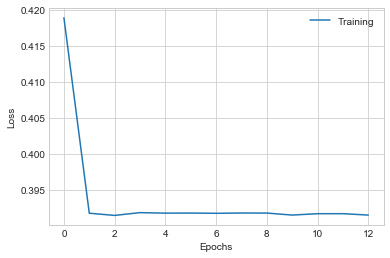

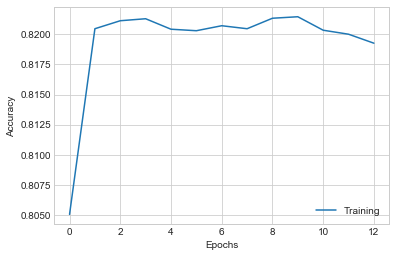

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.legend(['Training'], loc='lower right')
    plt.show()

plot_history(model_history)

# Neural Network

In [25]:
# fix random seed for reproducibility
np.random.seed(7)

In [26]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit the model
model.fit(x_prime, y, epochs=550, batch_size=100)

Epoch 1/550
30162/30162 [==============================] - 1s 21us/step - loss: 0.5229 - acc: 0.7563
Epoch 2/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.4225 - acc: 0.8037
Epoch 3/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.4084 - acc: 0.8106
Epoch 4/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.3989 - acc: 0.8157
Epoch 5/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.3884 - acc: 0.8214
Epoch 6/550
30162/30162 [==============================] - 0s 14us/step - loss: 0.3784 - acc: 0.8250
Epoch 7/550
30162/30162 [==============================] - 0s 14us/step - loss: 0.3648 - acc: 0.8301
Epoch 8/550
30162/30162 [==============================] - 0s 15us/step - loss: 0.3562 - acc: 0.8317
Epoch 9/550
30162/30162 [==============================] - 0s 14us/step - loss: 0.3530 - acc: 0.8338
Epoch 10/550
30162/30162 [==============================] - 0s 14us/step - loss: 0.3507 - a

30162/30162 [==============================] - 0s 13us/step - loss: 0.3289 - acc: 0.8450
Epoch 82/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.3295 - acc: 0.8428
Epoch 83/550
30162/30162 [==============================] - 0s 12us/step - loss: 0.3276 - acc: 0.8435
Epoch 84/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3277 - acc: 0.8444
Epoch 85/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3282 - acc: 0.8440
Epoch 86/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3274 - acc: 0.8458
Epoch 87/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3284 - acc: 0.8440
Epoch 88/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3276 - acc: 0.8461
Epoch 89/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3271 - acc: 0.8443
Epoch 90/550
30162/30162 [==============================] - 0s 15us/step - loss: 0.3277 - acc: 

30162/30162 [==============================] - 0s 15us/step - loss: 0.3191 - acc: 0.8501
Epoch 161/550
30162/30162 [==============================] - 0s 15us/step - loss: 0.3194 - acc: 0.8480
Epoch 162/550
30162/30162 [==============================] - 0s 16us/step - loss: 0.3191 - acc: 0.8488
Epoch 163/550
30162/30162 [==============================] - 0s 16us/step - loss: 0.3179 - acc: 0.8491
Epoch 164/550
30162/30162 [==============================] - 0s 15us/step - loss: 0.3190 - acc: 0.8487
Epoch 165/550
30162/30162 [==============================] - 1s 17us/step - loss: 0.3191 - acc: 0.8478
Epoch 166/550
30162/30162 [==============================] - 0s 16us/step - loss: 0.3188 - acc: 0.8502
Epoch 167/550
30162/30162 [==============================] - 1s 18us/step - loss: 0.3184 - acc: 0.8503
Epoch 168/550
30162/30162 [==============================] - 0s 15us/step - loss: 0.3188 - acc: 0.8492
Epoch 169/550
30162/30162 [==============================] - 0s 14us/step - loss: 0.318

30162/30162 [==============================] - 0s 11us/step - loss: 0.3143 - acc: 0.8524
Epoch 240/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3147 - acc: 0.8512
Epoch 241/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3143 - acc: 0.8511
Epoch 242/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3142 - acc: 0.8510
Epoch 243/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3148 - acc: 0.8528
Epoch 244/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3147 - acc: 0.8513
Epoch 245/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3149 - acc: 0.8504
Epoch 246/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3148 - acc: 0.8505
Epoch 247/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3149 - acc: 0.8498
Epoch 248/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.315

30162/30162 [==============================] - 0s 12us/step - loss: 0.3121 - acc: 0.8522
Epoch 319/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3128 - acc: 0.8527
Epoch 320/550
30162/30162 [==============================] - 0s 12us/step - loss: 0.3127 - acc: 0.8519
Epoch 321/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.3120 - acc: 0.8506
Epoch 322/550
30162/30162 [==============================] - 0s 12us/step - loss: 0.3114 - acc: 0.8523
Epoch 323/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.3123 - acc: 0.8513
Epoch 324/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3118 - acc: 0.8518
Epoch 325/550
30162/30162 [==============================] - 0s 12us/step - loss: 0.3119 - acc: 0.8523
Epoch 326/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3133 - acc: 0.8487
Epoch 327/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.310

30162/30162 [==============================] - 0s 10us/step - loss: 0.3091 - acc: 0.8538
Epoch 398/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3086 - acc: 0.8540
Epoch 399/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3096 - acc: 0.8538
Epoch 400/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3088 - acc: 0.8536
Epoch 401/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3086 - acc: 0.8540
Epoch 402/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3096 - acc: 0.8529
Epoch 403/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3087 - acc: 0.8542
Epoch 404/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3082 - acc: 0.8547
Epoch 405/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3105 - acc: 0.8530
Epoch 406/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.308

30162/30162 [==============================] - 0s 11us/step - loss: 0.3076 - acc: 0.8544
Epoch 477/550
30162/30162 [==============================] - 0s 10us/step - loss: 0.3075 - acc: 0.8549
Epoch 478/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3071 - acc: 0.8565
Epoch 479/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3090 - acc: 0.8546
Epoch 480/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3073 - acc: 0.8559
Epoch 481/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3077 - acc: 0.8556
Epoch 482/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3075 - acc: 0.8546
Epoch 483/550
30162/30162 [==============================] - 0s 11us/step - loss: 0.3076 - acc: 0.8555
Epoch 484/550
30162/30162 [==============================] - 0s 12us/step - loss: 0.3069 - acc: 0.8547
Epoch 485/550
30162/30162 [==============================] - 0s 13us/step - loss: 0.307

In [29]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6033/6033 [==============================] - 0s 27us/step

acc: 77.26%


In [30]:
evaluation = model.evaluate(X_test, y_test, verbose=1)

6033/6033 [==============================] - 0s 15us/step


In [31]:
evaluation [1]

0.7725841206894098

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.33581750546643
Test accuracy: 0.7725841206894098
